# 1. 정류장 지도 시각화

In [1]:
import pandas as pd

In [2]:
path = r'D:\jeju_bus_data_no_leakage\station'.replace('\\', '/')
result_path = r'C:\Users\think\Desktop\버스 정류장 클러스터링'.replace('\\', '/')

In [3]:
df = pd.read_csv(path + '/' + 'station_final.csv', encoding='ansi')

In [4]:
df['city'] = df['STATION_ADDR']
df.loc[:, 'city'] = df.loc[:, 'STATION_ADDR'].apply(lambda string: string.split(' ')[0])

In [5]:
df.city.unique() # 테스트

array(['제주시', '서귀포시'], dtype=object)

In [6]:
df.head() # 테스트

,STATION_ID,STATION_NM,CENTER_YN,LOCAL_X,LOCAL_Y,USE_YN,STATION_ADDR,city
0,405000152,남서광마을입구,N,126.521267,33.499683,Y,제주시 삼도1동,제주시
1,405000156,한국병원,N,126.518076,33.500054,Y,제주시 삼도1동,제주시
2,405000158,용천마을,N,126.519950,33.501547,Y,제주시 삼도1동,제주시
3,405000163,보건소,N,126.522067,33.492117,Y,제주시 도남동,제주시
4,405000169,광양사거리,N,126.527103,33.500473,Y,제주시 이도1동,제주시


In [7]:
jeju_city_station_df = df.query('city == "제주시"')

In [8]:
seogwipo_city_station_df = df.query('city == "서귀포시"')

In [9]:
import matplotlib.pyplot as plt

## 서귀포시
### 발견된 문제점: 제주연구원이 제공한 정류장 테이블이 이상하다.
### '분명히 제주시'에 해당하는 부근인데... 
### 서귀포 정류장이라고 표시된 데이터 포인트 3개!

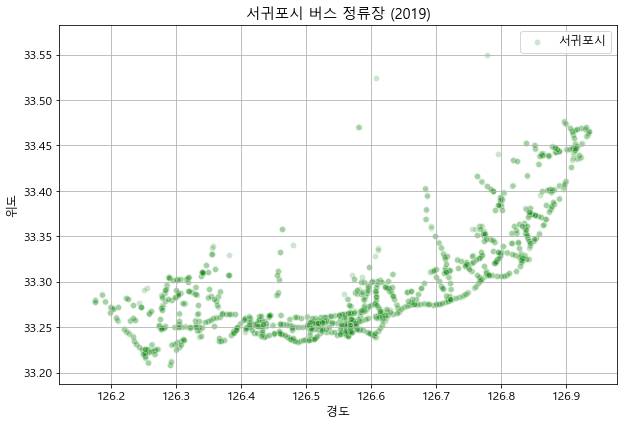

In [10]:
fig_title = '서귀포시 버스 정류장 (2019)'

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6.6))
plt.grid(True, which='both')
plt.scatter(x = jeju_city_station_df['LOCAL_X'], y = jeju_city_station_df['LOCAL_Y'], marker = 'o', 
            c = 'white', alpha = '0.2', edgecolors = 'white')
plt.scatter(x = seogwipo_city_station_df['LOCAL_X'], y = seogwipo_city_station_df['LOCAL_Y'], marker = 'o', 
            c = 'green', alpha = '0.2', edgecolors = 'white', label = '서귀포시')
plt.legend()
plt.xlabel('경도')
plt.ylabel('위도')
plt.title(fig_title)
# plt.rcParams['figure.figsize']
# 6 : 4 = 10 : 6.6
plt.gcf().savefig(result_path + '/' + fig_title)
plt.show()

In [17]:
# 서귀포 -> 이상 데이터 포인트(1)
seogwipo_city_station_df.query('126.5 < LOCAL_X < 126.6 and 33.45 < LOCAL_Y < 33.5') 

,STATION_ID,STATION_NM,CENTER_YN,LOCAL_X,LOCAL_Y,USE_YN,STATION_ADDR,city
890,405000589,시각장애인복지관,N,126.580685,33.470722,Y,서귀포시 월평동,서귀포시
978,405000588,시각장애인복지관,N,126.580995,33.470462,Y,서귀포시 월평동,서귀포시


In [18]:
# 서귀포 -> 이상 데이터 포인트(2)
seogwipo_city_station_df.query('126.6 < LOCAL_X < 126.7 and 33.5 < LOCAL_Y < 33.55') 

,STATION_ID,STATION_NM,CENTER_YN,LOCAL_X,LOCAL_Y,USE_YN,STATION_ADDR,city
12,405000183,진드르,N,126.608128,33.524196,Y,서귀포시 표선면 가시리,서귀포시


In [19]:
# 서귀포 -> 이상 데이터 포인트(3)
seogwipo_city_station_df.query('126.7 < LOCAL_X < 126.8 and 33.5 < LOCAL_Y < 33.6') 

,STATION_ID,STATION_NM,CENTER_YN,LOCAL_X,LOCAL_Y,USE_YN,STATION_ADDR,city
1142,405000812,만장굴입구,N,126.77827,33.549181,Y,서귀포시 남원읍 하례리,서귀포시


## 제주시

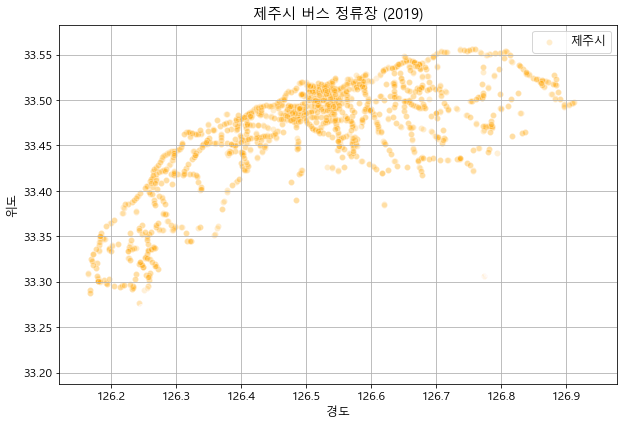

In [11]:
fig_title = '제주시 버스 정류장 (2019)'

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6.6))
plt.grid(True, which='both')
plt.scatter(x = jeju_city_station_df['LOCAL_X'], y = jeju_city_station_df['LOCAL_Y'], marker = 'o', 
            c = 'orange', alpha = '0.2', edgecolors = 'white', label = '제주시')
plt.scatter(x = seogwipo_city_station_df['LOCAL_X'], y = seogwipo_city_station_df['LOCAL_Y'], marker = 'o', 
            c = 'white', alpha = '0.2', edgecolors = 'white')
plt.legend()
plt.xlabel('경도')
plt.ylabel('위도')
plt.title(fig_title)
# plt.rcParams['figure.figsize']
# 6 : 4 = 10 : 6.6
plt.gcf().savefig(result_path + '/' + fig_title)
plt.show()

## 제주시+서귀포시

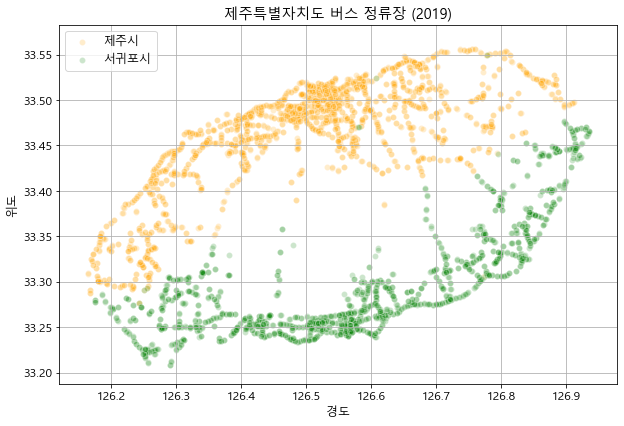

In [12]:
fig_title = '제주특별자치도 버스 정류장 (2019)'

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6.6))
plt.grid(True, which='both')
plt.scatter(x = jeju_city_station_df['LOCAL_X'], y = jeju_city_station_df['LOCAL_Y'], marker = 'o', 
            c = 'orange', alpha = '0.2', edgecolors = 'white', label = '제주시')
plt.scatter(x = seogwipo_city_station_df['LOCAL_X'], y = seogwipo_city_station_df['LOCAL_Y'], marker = 'o', 
            c = 'green', alpha = '0.2', edgecolors = 'white', label = '서귀포시')
plt.legend()
plt.xlabel('경도')
plt.ylabel('위도')
plt.title(fig_title)
# plt.rcParams['figure.figsize']
# 6 : 4 = 10 : 6.6
plt.gcf().savefig(result_path + '/' + fig_title)
plt.show()

# * 서귀포시 이상치 데이터 수정 후 재시각화

In [20]:
df = pd.read_csv(path + '/' + 'station_final.csv', encoding='ansi')

In [21]:
df['city'] = df['STATION_ADDR']
df.loc[:, 'city'] = df.loc[:, 'STATION_ADDR'].apply(lambda string: string.split(' ')[0])

In [22]:
jeju_city_station_df = df.query('city == "제주시"')

In [23]:
seogwipo_city_station_df = df.query('city == "서귀포시"')

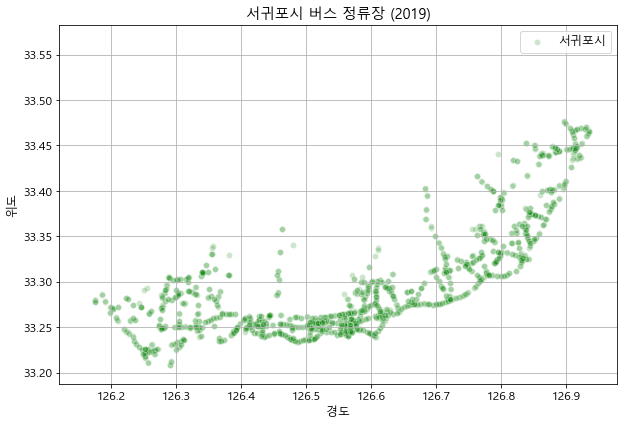

In [24]:
fig_title = '서귀포시 버스 정류장 (2019)'

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6.6))
plt.grid(True, which='both')
plt.scatter(x = jeju_city_station_df['LOCAL_X'], y = jeju_city_station_df['LOCAL_Y'], marker = 'o', 
            c = 'white', alpha = '0.2', edgecolors = 'white')
plt.scatter(x = seogwipo_city_station_df['LOCAL_X'], y = seogwipo_city_station_df['LOCAL_Y'], marker = 'o', 
            c = 'green', alpha = '0.2', edgecolors = 'white', label = '서귀포시')
plt.legend()
plt.xlabel('경도')
plt.ylabel('위도')
plt.title(fig_title)
# plt.rcParams['figure.figsize']
# 6 : 4 = 10 : 6.6
plt.gcf().savefig(result_path + '/' + '보정 후' + fig_title)
plt.show()

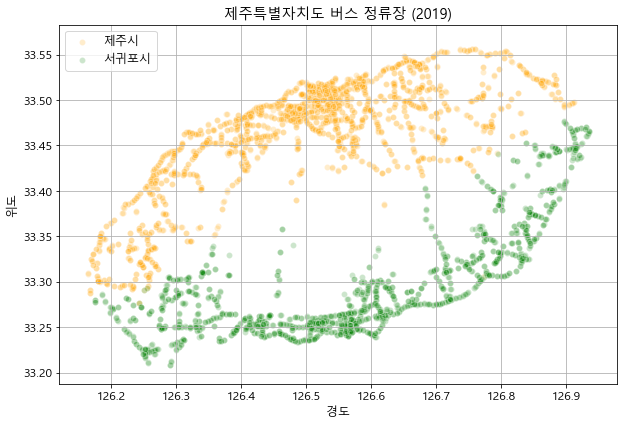

In [25]:
fig_title = '제주특별자치도 버스 정류장 (2019)'

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6.6))
plt.grid(True, which='both')
plt.scatter(x = jeju_city_station_df['LOCAL_X'], y = jeju_city_station_df['LOCAL_Y'], marker = 'o', 
            c = 'orange', alpha = '0.2', edgecolors = 'white', label = '제주시')
plt.scatter(x = seogwipo_city_station_df['LOCAL_X'], y = seogwipo_city_station_df['LOCAL_Y'], marker = 'o', 
            c = 'green', alpha = '0.2', edgecolors = 'white', label = '서귀포시')
plt.legend()
plt.xlabel('경도')
plt.ylabel('위도')
plt.title(fig_title)
# plt.rcParams['figure.figsize']
# 6 : 4 = 10 : 6.6
plt.gcf().savefig(result_path + '/' + '보정 후' + fig_title)
plt.show()